In [403]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px
import plotly.graph_objects as go

In [404]:
url="https://raw.githubusercontent.com/YuLe33/Final-Project-df_full_premierleague1/main/data%20set/df_full_premierleague.csv"
data=pd.read_csv(url)
del(data['Unnamed: 0'],data['link_match'])
data["home_win"]=np.nan
data["date"]=pd.to_datetime(data.date)
data=data.sort_values(by="date")
data = data.reset_index(drop=True)

In [405]:
scors = data["result_full"].str.extract("(\d+)-(\d+)")
data["home_win"] =(scors[0]>scors[1]).astype(int)
tie=(scors[0]==scors[1])
win=scors[0]>scors[1]
lose=scors[0]<scors[1]
data.loc[tie,"home_win"] ="draw"
data.loc[win,"home_win"] ="win"
data.loc[lose,"home_win"] ="lose"

In [406]:
data[["season","date","home_team","away_team","result_ht","home_win"]]

,season,date,home_team,away_team,result_ht,home_win
0,10/11,2010-08-14,Aston Villa,West Ham United,2-0,win
1,10/11,2010-08-14,Bolton Wanderers,Fulham,0-0,draw
2,10/11,2010-08-14,Chelsea,West Bromwich Albion,2-0,win
3,10/11,2010-08-14,Sunderland,Birmingham City,1-0,draw
4,10/11,2010-08-14,Tottenham Hotspur,Manchester City,0-0,draw
...,...,...,...,...,...,...
4065,20/21,2021-03-06,Brighton and Hove Albion,Leicester City,1-0,lose
4066,20/21,2021-03-06,Burnley,Arsenal,1-1,draw
4067,20/21,2021-03-07,West Bromwich Albion,Newcastle United,0-0,draw
4068,20/21,2021-03-07,Liverpool,Fulham,0-1,lose


# tovana 1

In [407]:
home, away = data['result_full'].str.split('-',1).str
data['home_goals'] = home
data['away_goals'] = away
data['home_goals'] = data['home_goals'].astype(int)
data['away_goals'] = data['away_goals'].astype(int)

C:\Users\laser\AppData\Local\Temp/ipykernel_18464/3713876565.py:1: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.



In [408]:
data['home_win_score'] = (data.loc[:,'home_goals']-data.loc[:,'away_goals'])>0
data['away_win_score'] = (data.loc[:,'away_goals']-data.loc[:,'home_goals'])>0
data['home_win_score'] = data['home_win_score'].astype(int)
data['away_win_score'] = data['away_win_score'].astype(int)

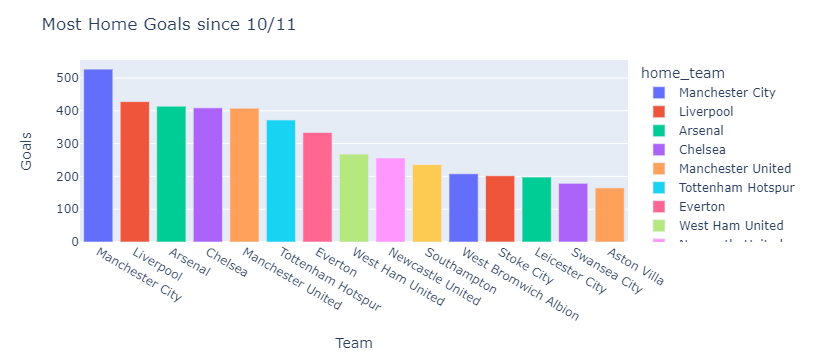

In [409]:
total_home_goals = data.groupby('home_team')['home_goals'].sum().sort_values(ascending=False).reset_index()
# total_home_goals
sketch = px.bar(total_home_goals.head(15),x='home_team', y='home_goals',color='home_team')
sketch.update_layout(title='Most Home Goals since 10/11',xaxis_title='Team',yaxis_title='Goals')
sketch.show()

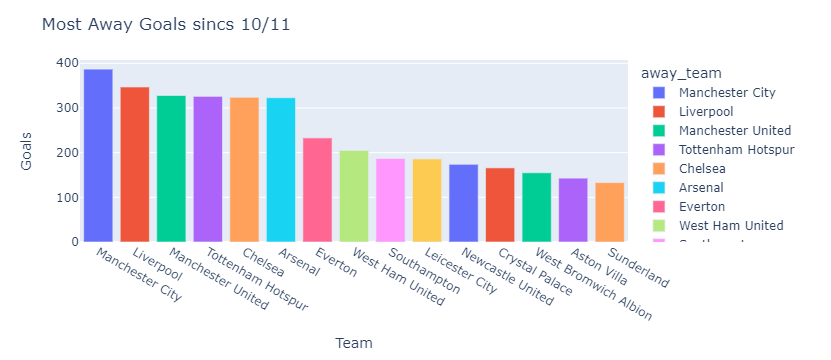

In [410]:
total_away_goals = data.groupby('away_team')['away_goals'].sum().sort_values(ascending=False).reset_index()
sketch_2 = px.bar(total_away_goals.head(15),x='away_team',y='away_goals',color='away_team')
sketch_2.update_layout(title='Most Away Goals sincs 10/11',xaxis_title='Team',yaxis_title='Goals')
sketch_2.show()

In [411]:
ch=data.groupby(["season"])[["home_corners","away_corners","home_possession","away_possession","home_shots","away_shots","home_shots_on_target","away_shots_on_target","goal_home_ft","goal_away_ft"]].mean()


In [412]:
home_corners=data["home_corners"].mean()
away_corners=data["away_corners"].mean()
home_possession=data["home_possession"].mean()
away_possession=data["away_possession"].mean()
home_shots=data["home_shots"].mean()
away_shots=data["away_shots"].mean()
home_shots_on_target=data["home_shots_on_target"].mean()
away_shots_on_target=data["away_shots_on_target"].mean()
goal_home_ft=data["goal_home_ft"].mean()
goal_away_ft=data["goal_away_ft"].mean()

In [413]:
d = [['home_team',home_corners,home_possession,home_shots,home_shots_on_target,goal_home_ft], ['away_team',away_corners,away_possession,away_shots,away_shots_on_target,goal_away_ft]]
df3 = pd.DataFrame(d, columns = ["main","corners","possession","shots","shots_on_target","goal"])

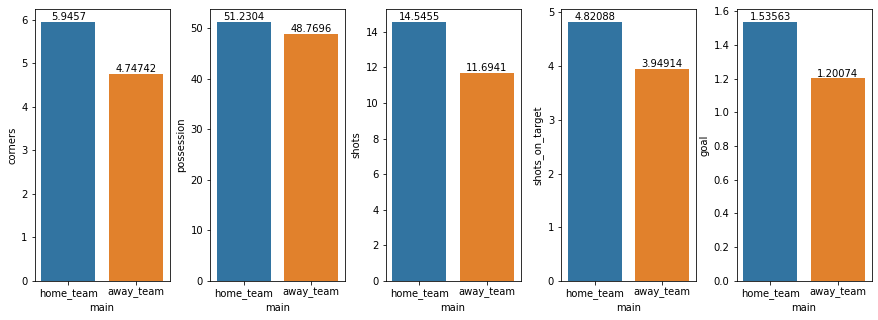

In [457]:
fig, axes = plt.subplots(figsize=(15,5), ncols=5)
plt.subplots_adjust(wspace = 0.3)
a=sns.barplot(x="main", y="corners",ci = None,data=df3,ax=axes[0,])
a.bar_label(a.containers[0])
b=sns.barplot(x="main", y="possession",ci = None,data=df3, ax = axes[1])
b.bar_label(b.containers[0])
c=sns.barplot(x="main", y="shots",ci = None,data=df3, ax = axes[2])
c.bar_label(c.containers[0])
d=sns.barplot(x="main", y="shots_on_target",ci = None, data=df3,ax=axes[3])
d.bar_label(d.containers[0])
e=sns.barplot(x="main", y="goal",ci = None,data=df3,ax=axes[4])
e.bar_label(e.containers[0])

#a.title("the scale on Y axis present as a percentage")
plt.show()

# tovana 2 

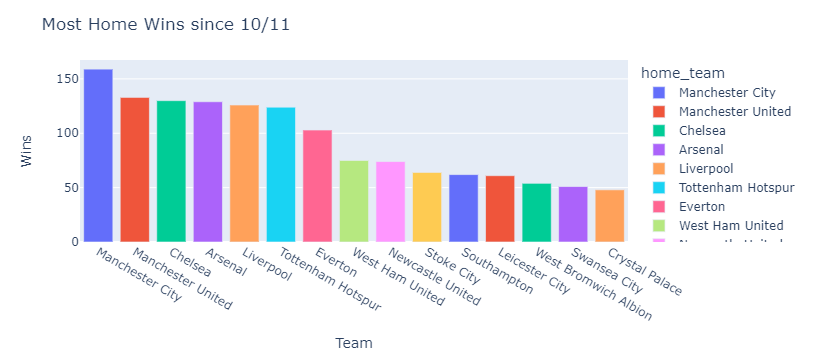

In [415]:
total_home_wins = data.groupby('home_team')['home_win_score'].sum().sort_values(ascending=False).reset_index()
home_wins_sketch = px.bar(total_home_wins.head(15),x='home_team',y='home_win_score',color='home_team')
home_wins_sketch.update_layout(title='Most Home Wins since 10/11',xaxis_title='Team',yaxis_title='Wins')
home_wins_sketch.show()

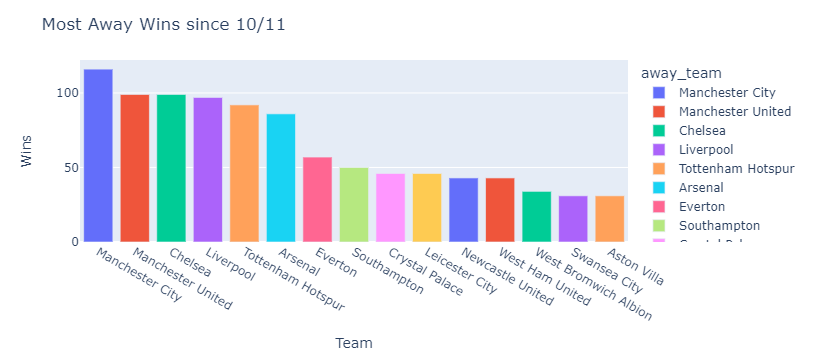

In [416]:
total_away_wins = data.groupby('away_team')['away_win_score'].sum().sort_values(ascending=False).reset_index()
away_wins_sketch = px.bar(total_away_wins.head(15),x='away_team',y='away_win_score',color='away_team')
away_wins_sketch.update_layout(title='Most Away Wins since 10/11',xaxis_title='Team',yaxis_title='Wins')
away_wins_sketch.show()

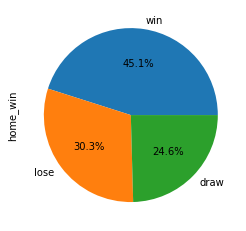

In [417]:
home=data["home_win"].value_counts().plot.pie(autopct='%1.1f%%')

As we found that the last game as played before covid 19 arrive to England was at 1-3-2020


# tovana 3 

In [418]:
# data[data.loc[:,"date"]=="2020-3"]

In [419]:
before_covid=data.iloc[0:3697]

The desicion to open the doors of the football stadium had happen at the 7 of may, due to all of the games of season 20/21 we have in the data set is without crowd

In [420]:
# data[data.loc[:,"season"]=="20/21"]

In [421]:
covid_times=data.iloc[3698:]

In [422]:
# covid_times

In [423]:
# fig,(before_covid_pie,covid_times_pie)=plt.subplots(1,2,figsize=(10,10))
# labels = "home team win","home team lose","draw"
# values = before_covid["home_win"].value_counts()
# before_covid_pie.pie(values,labels = labels,autopct = '%1.1f%%') #plot first pie
# before_covid_pie.set_title("% success of hosting team befor covid")

# labels = "home team win","home team lose","draw"
# values = covid_times["home_win"].value_counts()
# covid_times_pie.pie(values,labels = labels,autopct = '%1.1f%%') #plot second pie
# covid_times_pie.set_title("% success of hosting team in covid times")
# plt.show()

In [424]:
before_covid_all=len(before_covid["home_win"])
before_covid_w=before_covid["home_win"][before_covid.loc[:,"home_win"]=="win"].count()/before_covid_all*100
before_covid_d=before_covid["home_win"][before_covid.loc[:,"home_win"]=="draw"].count()/before_covid_all*100
before_covid_l=before_covid["home_win"][before_covid.loc[:,"home_win"]=="lose"].count()/before_covid_all*100

In [425]:
covid_all_games=len(covid_times["home_win"])
covid_w=covid_times["home_win"][covid_times.loc[:,"home_win"]=="win"].count()/covid_all_games*100
covid_d=covid_times["home_win"][covid_times.loc[:,"home_win"]=="draw"].count()/covid_all_games*100
covid_l=covid_times["home_win"][covid_times.loc[:,"home_win"]=="lose"].count()/covid_all_games*100

In [426]:
a = [['before_covid',before_covid_w,before_covid_d,before_covid_l], ['covid_times', covid_w,covid_d,covid_l]]
df = pd.DataFrame(a, columns = ["Times",'W', 'D',"L"])
df

,Times,W,D,L
0,before_covid,45.604544,24.722748,29.672708
1,covid_times,39.784946,23.118280,37.096774


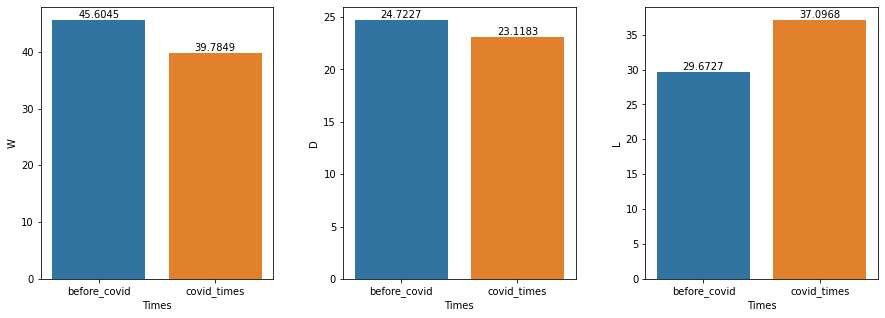

In [427]:
fig, axes = plt.subplots(figsize=(15, 5), ncols=3)
plt.subplots_adjust(wspace = 0.3)
a=sns.barplot(x="Times", y="W",ci = None, estimator = sum, data=df,ax=axes[0])
a.bar_label(a.containers[0])
b=sns.barplot(x="Times", y="D",ci = None, estimator = sum, data=df, ax = axes[1])
b.bar_label(b.containers[0])
c=sns.barplot(x="Times", y="L",ci = None, estimator = sum, data=df, ax = axes[2])
c.bar_label(c.containers[0])
#a.title("the scale on Y axis present as a percentage")
plt.show()